# Cleaning Data with Pandas Exercises

For the exercises, you will be cleaning data in the Women's Clothing E-Commerce Reviews dataset.

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [2]:
# Import pandas and any other libraries you need here.
import pandas as pd

# Create a new dataframe from your CSV
#I don't want the first column to be imported so I tell python that the first column is index column
ReviewDataFrame = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [3]:
# Print out any information you need to understand your dataframe
print(ReviewDataFrame.head())

   Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2       

## Missing Data

Try out different methods to locate and resolve missing data.

In [4]:
# Try to find some missing data
#ReviewDataFrame.isna()
#rows_with_missing_data = ReviewDataFrame[ReviewDataFrame.isna().any(axis=1)]
rows_with_missing_data = ReviewDataFrame[ReviewDataFrame.drop(columns=['Title','Review Text']).isna().any(axis=1)]

print (rows_with_missing_data)

       Clothing ID  Age                                  Title  \
9444            72   25                   My favorite socks!!!   
13767          492   23                               So soft!   
13768          492   49                        Wardrobe staple   
13787          492   48                                    NaN   
16216          152   36                          Warm and cozy   
16221          152   37                                  Love!   
16223          152   39                        "long and warm"   
18626          184   34                  Nubby footless tights   
18671          184   54                          New workhorse   
20088          772   50                      Comfy sweatshirt!   
21532          665   43                           So worth it!   
22997          136   47  Charcoal, pale gray, a bit of silver!   
23006          136   33                        Cute itsy socks   
23011          136   36                            Super socks   

         

Did you find any missing data? What things worked well for you and what did not?

In [5]:
# Respond to the above questions here:
'''
Initially, I used .isna() to check for missing values, 
but it showed all the rows, which wasn't very useful for identifying the problematic ones. 
To address this, I filtered the DataFrame to display only the rows with missing data using the following code:
 
        rows_with_missing_data = ReviewDataFrame[ReviewDataFrame.isna().any(axis=1)]

This revealed that many rows had missing data in the Title and Review Text columns.
Since I don't need these two columns for my analysis, I updated the code to exclude them from the check by dropping them:

    rows_with_missing_data = ReviewDataFrame[ReviewDataFrame.drop(columns=['Title', 'Review Text']).isna().any(axis=1)]


'''


"\nInitially, I used .isna() to check for missing values, \nbut it showed all the rows, which wasn't very useful for identifying the problematic ones. \nTo address this, I filtered the DataFrame to display only the rows with missing data using the following code:\n \n        rows_with_missing_data = ReviewDataFrame[ReviewDataFrame.isna().any(axis=1)]\n\nThis revealed that many rows had missing data in the Title and Review Text columns.\nSince I don't need these two columns for my analysis, I updated the code to exclude them from the check by dropping them:\n\n    rows_with_missing_data = ReviewDataFrame[ReviewDataFrame.drop(columns=['Title', 'Review Text']).isna().any(axis=1)]\n\n\n"

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers.

                Age        Rating  Recommended IND  Positive Feedback Count
count  23486.000000  23486.000000     23486.000000             23486.000000
mean      43.198544      4.196032         0.822362                 2.535936
std       12.279544      1.110031         0.382216                 5.702202
min       18.000000      1.000000         0.000000                 0.000000
25%       34.000000      4.000000         1.000000                 0.000000
50%       41.000000      5.000000         1.000000                 1.000000
75%       52.000000      5.000000         1.000000                 3.000000
max       99.000000      5.000000         1.000000               122.000000


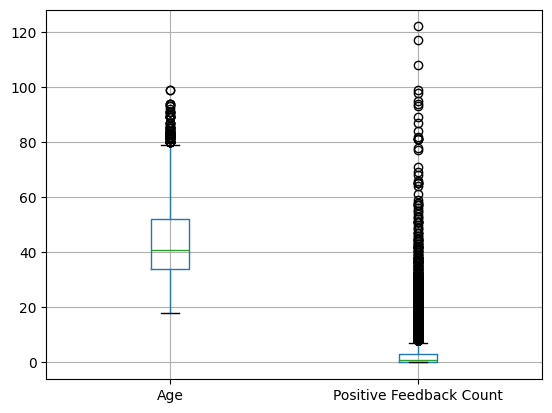

In [6]:
# Keep an eye out for outliers!
import matplotlib.pyplot  as plt

# Drop columns that we don't need to analyze from the DataFrame before using describe
ReviewDataFrame_dropped = ReviewDataFrame.drop(columns=['Clothing ID'])
# Get descriptive statistics
summary = ReviewDataFrame_dropped.describe()
print(summary)

# Plot boxlplot of the 'Rating' column
ReviewDataFrame_dropped[['Age','Positive Feedback Count']].boxplot()
# Show the plot
plt.show()



What techniques helped you find outliers? In your opinion, what about the techniques you used made them effective?

In [7]:
# Make your notes here:
''' At first I used the describe() to get some descriptive stats. 
Based on that, I could see the positive feedback count had outliers with max of 122 but a mean of only 2.53. 
Age has some high values as well with max of 99.
I did a box plot and it shows outliers in the higher range for Age and positive feedback count
'''

' At first I used the describe() to get some descriptive stats. \nBased on that, I could see the positive feedback count had outliers with max of 122 but a mean of only 2.53. \nAge has some high values as well with max of 99.\nI did a box plot and it shows outliers in the higher range for Age and positive feedback count\n'

## Unnecessary Data

Unnecessary data could be irrelevant to your analysis or a duplice column. Check out the dataset to see if there is any unnecessary data.

In [8]:
# Look out for unnecessary data!

ReviewDataFrame = ReviewDataFrame.drop(columns=['Clothing ID', 'Title', 'Review Text'])

print(ReviewDataFrame)

       Age  Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       33       4                1                        0       Initmates   
1       34       5                1                        4         General   
2       60       3                0                        0         General   
3       50       5                1                        0  General Petite   
4       47       5                1                        6         General   
...    ...     ...              ...                      ...             ...   
23481   34       5                1                        0  General Petite   
23482   48       3                1                        0  General Petite   
23483   31       3                0                        1  General Petite   
23484   28       3                1                        2         General   
23485   52       5                1                       22  General Petite   

      Department Name Class Name  
0   

Did you find any unnecessary data in your dataset? How did you handle it?

In [9]:
# Make your notes here.
'''
I don't need 'Clothing ID', 'Title', 'Review Text' so I dropped them 
'''


"\nI don't need 'Clothing ID', 'Title', 'Review Text' so I dropped them \n"

## Inconsistent Data

Inconsistent data is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [10]:
# Look out for inconsistent data!

ReviewDataFrame['Recommended IND'] = ReviewDataFrame['Recommended IND'].astype('bool')
print(ReviewDataFrame)

       Age  Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       33       4             True                        0       Initmates   
1       34       5             True                        4         General   
2       60       3            False                        0         General   
3       50       5             True                        0  General Petite   
4       47       5             True                        6         General   
...    ...     ...              ...                      ...             ...   
23481   34       5             True                        0  General Petite   
23482   48       3             True                        0  General Petite   
23483   31       3            False                        1  General Petite   
23484   28       3             True                        2         General   
23485   52       5             True                       22  General Petite   

      Department Name Class Name  
0   

Did you find any inconsistent data? What did you do to clean it?

In [11]:
# Make your notes here!
'''
I didn't find inconsistent data but converted Recommended IND to boolean as that makes more sense than a number
'''

"\nI didn't find inconsistent data but converted Recommended IND to boolean as that makes more sense than a number\n"